In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 60-40-30

In [7]:
probs = {1: 60, 2: 40, 3: 30}

In [2]:
df_hr = pd.read_csv('../sample_data/MAB_test_run_G5-G8_604030-21.12.01_PROCESSED.csv')
ids = df_hr['animalID'].unique()

df_hr.sort_values(by=['animalID', 'session', 'trial'], inplace=True)
df_hr.insert(3, 'trialTotal', np.NaN)
df_hr['trialTotal']  = df_hr.groupby('animalID').cumcount()+1

df_hr.head()

,animalID,session,trial,trialTotal,trialStart,trialEnd,trialDuration,startLatency,decisionNumber,decisionPosition,decisionImage,decisionLatency,reward,rewardLatency
0,G5,1,1,1,2021-12-01 17:33:03.260000000,2021-12-01 17:33:07.640000000,4.38,8.30,1,3,4,4.38,False,NaN
1,G5,1,2,2,2021-12-01 17:33:19.769999872,2021-12-01 17:33:29.820000000,10.05,5.12,2,1,1,10.05,False,NaN
2,G5,1,3,3,2021-12-01 17:33:41.560000000,2021-12-01 17:33:54.849999872,13.29,4.74,2,3,1,6.85,True,1.44
3,G5,1,4,4,2021-12-01 17:34:17.309999872,2021-12-01 17:34:19.960000000,2.66,15.46,3,3,3,2.65,False,NaN
4,G5,1,5,5,2021-12-01 17:34:27.970000128,2021-12-01 17:34:37.950000128,9.98,1.00,1,2,4,3.46,True,1.52


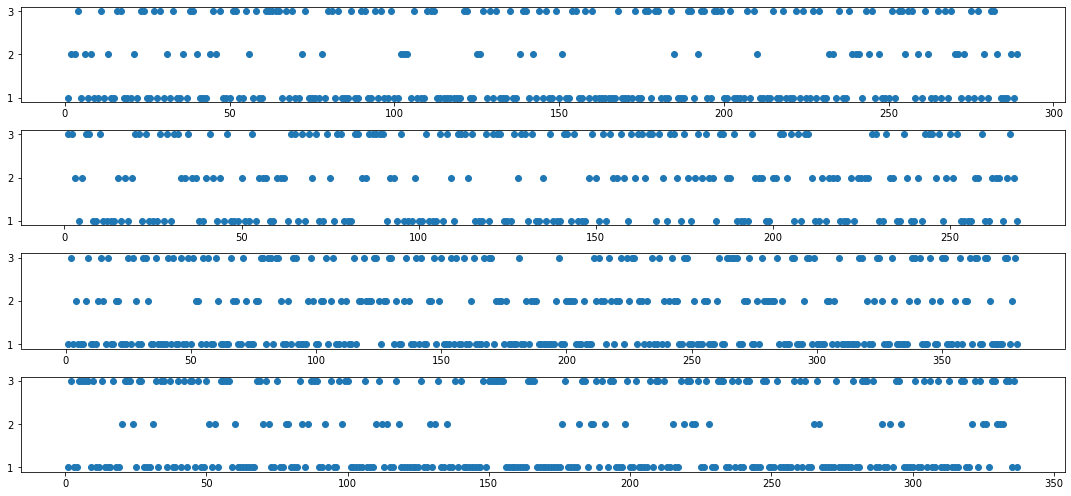

In [3]:
plt.figure(figsize=(15,7))

for (i, animal_id) in enumerate(ids):
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        df_hr[df_hr['animalID'] == animal_id]['trialTotal'],
        df_hr[df_hr['animalID'] == animal_id]['decisionNumber'],
        'o')

plt.tight_layout()
plt.show()

In [8]:
probs

{1: 60, 2: 40, 3: 30}

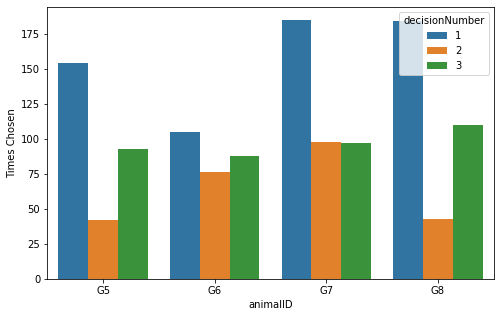

In [6]:
decision_counts = df_hr.groupby(['animalID', 'decisionNumber'], as_index=False)['trial'].count()

plt.figure(figsize=(8,5))
sns.barplot(data=decision_counts, x='animalID', y='trial', hue='decisionNumber')
plt.ylabel('Times Chosen')
plt.show()

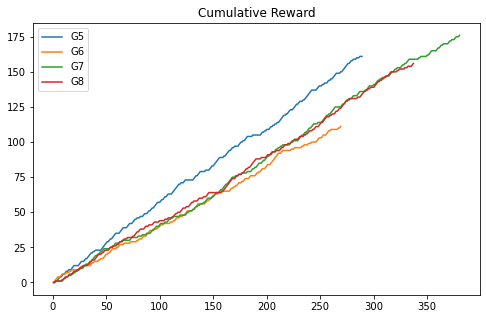

In [12]:
df_hr['rewardCumulative'] = df_hr.groupby('animalID')['reward'].cumsum()

plt.figure(figsize=(8,5))

for (i, animal_id) in enumerate(ids):
    plt.plot(
        df_hr[df_hr['animalID'] == animal_id]['trialTotal'],
        df_hr[df_hr['animalID'] == animal_id]['rewardCumulative'],
        label=animal_id)

plt.legend()
plt.title('Cumulative Reward')
plt.show()

# 20-20-80

In [13]:
probs = {1:20, 2:20, 3:80}

In [14]:
df_lr = pd.read_csv('../sample_data/MAB_test_run_G5-G8_202080-21.12.02_PROCESSED.csv')
ids = df_lr['animalID'].unique()

df_lr.sort_values(by=['animalID', 'session', 'trial'], inplace=True)
df_lr.insert(3, 'trialTotal', np.NaN)
df_lr['trialTotal']  = df_lr.groupby('animalID').cumcount()+1

df_lr.head()

,animalID,session,trial,trialTotal,trialStart,trialEnd,trialDuration,startLatency,decisionNumber,decisionPosition,decisionImage,decisionLatency,reward,rewardLatency
0,G5,1,1,1,2021-12-02 15:18:32.920000000,2021-12-02 15:18:56.690000128,23.77,19.32,3,3,3,10.60,True,8.17
1,G5,1,2,2,2021-12-02 15:19:19.809999872,2021-12-02 15:19:24.640000000,4.83,16.11,2,3,1,4.83,False,NaN
2,G5,1,3,3,2021-12-02 15:19:39.690000128,2021-12-02 15:19:47.400000000,7.72,8.04,1,1,4,7.71,False,NaN
3,G5,1,4,4,2021-12-02 15:19:54.930000128,2021-12-02 15:20:00.300000000,5.37,0.52,1,3,4,5.37,False,NaN
4,G5,1,5,5,2021-12-02 15:20:59.060000000,2021-12-02 15:21:03.940000000,4.88,51.76,1,3,4,4.88,False,NaN


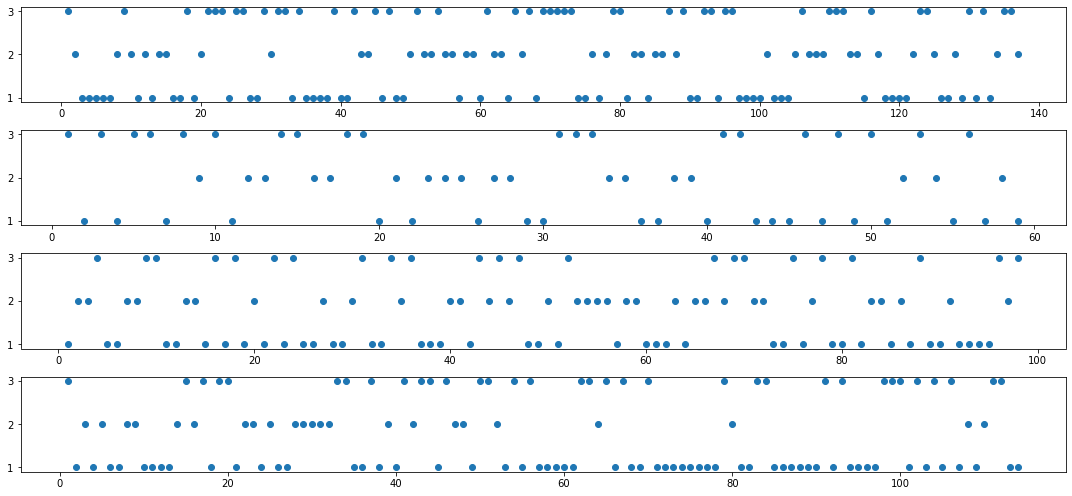

In [15]:
plt.figure(figsize=(15,7))

for (i, animal_id) in enumerate(ids):
    plt.subplot(len(ids), 1, i+1)
    plt.plot(
        df_lr[df_lr['animalID'] == animal_id]['trialTotal'],
        df_lr[df_lr['animalID'] == animal_id]['decisionNumber'],
        'o')

plt.tight_layout()
plt.show()

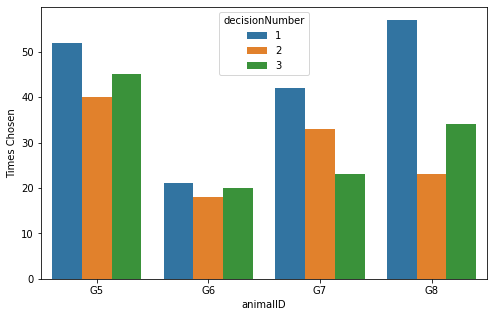

In [19]:
decision_counts = df_lr.groupby(['animalID', 'decisionNumber'], as_index=False)['trial'].count()

plt.figure(figsize=(8,5))
sns.barplot(data=decision_counts, x='animalID', y='trial', hue='decisionNumber')
plt.ylabel('Times Chosen')
plt.show()

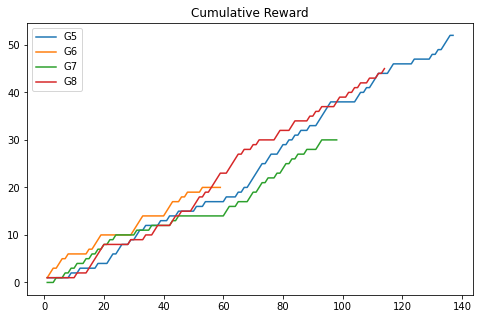

In [20]:
df_lr['rewardCumulative'] = df_lr.groupby('animalID')['reward'].cumsum()

plt.figure(figsize=(8,5))

for (i, animal_id) in enumerate(ids):
    plt.plot(
        df_lr[df_lr['animalID'] == animal_id]['trialTotal'],
        df_lr[df_lr['animalID'] == animal_id]['rewardCumulative'],
        label=animal_id)

plt.legend()
plt.title('Cumulative Reward')
plt.show()